In [42]:
#setting working directory
getwd()
setwd("D:/Folders/R/Time Series")

[1] "D:/Folders/R/Time Series"

In [43]:
#installing and importing libraries

library(tseries)
library(dplyr)
library(ggplot2)
library(corrplot)
library(forecast)
library(zoo)
library(roll)
library(urca)
library(xts)
library(rlang)

#DATA IMPORT AND CLEANING
#importing data - taken from https://www.kaggle.com/andreazzini/international-airline-passengers/data
#fileencoding allows to read the characters as correctly as they would appear on the raw dataset
#na.strings allows to replace blanks with NAs


In [45]:
IntlAirPassengers4 <- read.csv("D:/Folders/R/Time Series/international-airline-passengers.csv",fileEncoding="UTF-8-BOM",na.strings = '..', stringsAsFactors =FALSE)


In [46]:
#data cleaning
IntlAirPassengers3 <- IntlAirPassengers4 %>%  rename(monthly_passengers = International.airline.passengers..monthly.totals.in.thousands..Jan.49...Dec.60,
                                                     month_old = Month) 

IntlAirPassengers2 <- IntlAirPassengers3[-c(145),]

#converting to datetime
IntlAirPassengers2$Month <- as.Date(paste(IntlAirPassengers2$month_old,"-01",sep=""))

#removing unwanted rows
IntlAirPassengers <- IntlAirPassengers2[,-c(1)]
IntlAirPassengers

monthly_passengers,Month
112,1949-01-01
118,1949-02-01
132,1949-03-01
129,1949-04-01
121,1949-05-01
135,1949-06-01
148,1949-07-01
148,1949-08-01
136,1949-09-01
119,1949-10-01


In [47]:

# CHECKING THE DATA – MEASURES OF CENTRAL TENDENCY AND DATA TYPES
### list objects in the working environment
ls(IntlAirPassengers)

### list the structure of IntlAirPassengers
str(IntlAirPassengers)

### dimensions of an object
dim(IntlAirPassengers)

### class of an object (numeric, matrix, data frame, etc)
class(IntlAirPassengers)

### print first 10 rows of mydata
head(IntlAirPassengers, n=10)
summary(IntlAirPassengers)

#printing max and min time period
strtdt <- min(IntlAirPassengers$Month)
enddt <- max(IntlAirPassengers$Month)
cat("\nTime period start: ", as.character(strtdt))
cat("\nTime period end: ", as.character(enddt))


[1] "Month"              "monthly_passengers"

'data.frame':	144 obs. of  2 variables:
 $ monthly_passengers: int  112 118 132 129 121 135 148 148 136 119 ...
 $ Month             : Date, format: "1949-01-01" "1949-02-01" ...


[1] 144   2

[1] "data.frame"

monthly_passengers,Month
112,1949-01-01
118,1949-02-01
132,1949-03-01
129,1949-04-01
121,1949-05-01
135,1949-06-01
148,1949-07-01
148,1949-08-01
136,1949-09-01
119,1949-10-01


 monthly_passengers     Month           
 Min.   :104.0      Min.   :1949-01-01  
 1st Qu.:180.0      1st Qu.:1951-12-24  
 Median :265.5      Median :1954-12-16  
 Mean   :280.3      Mean   :1954-12-16  
 3rd Qu.:360.5      3rd Qu.:1957-12-08  
 Max.   :622.0      Max.   :1960-12-01  


Time period start:  1949-01-01
Time period end:  1960-12-01

In [48]:
#DATA VISUALIZATION FOR INSPECTION
#in case there are multiple columns, we may need to combine them to see a boxplot


Warning message:
"Use of `IntlAirPassengers$monthly_passenger` is discouraged. Use `monthly_passenger` instead."Warning message:
"Use of `IntlAirPassengers$monthly_passenger` is discouraged. Use `monthly_passenger` instead."

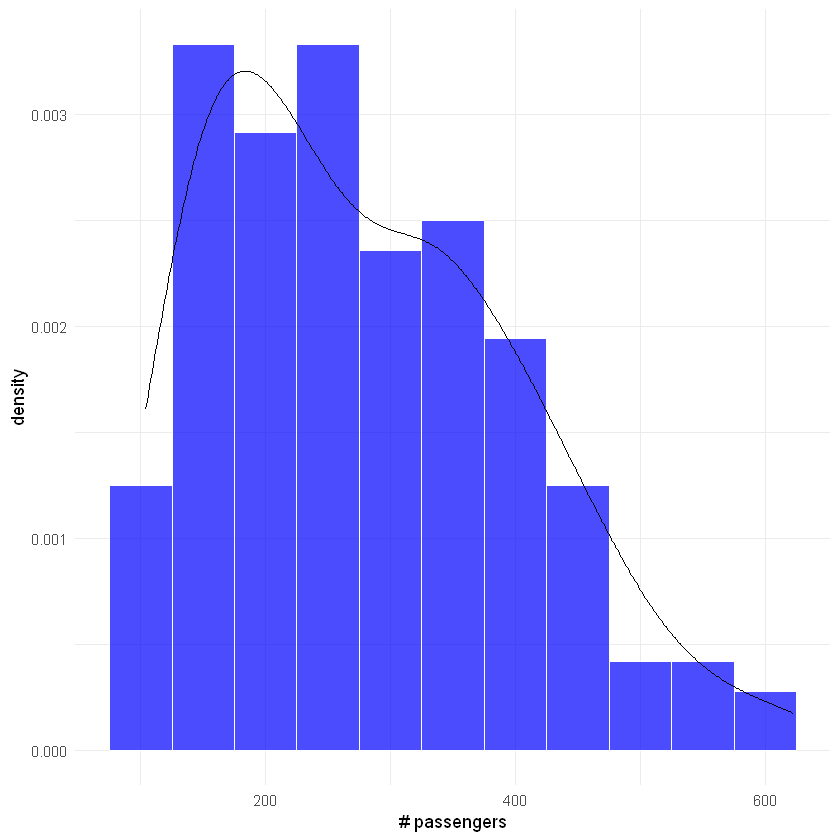

In [49]:

#barplot
ggplot(data = IntlAirPassengers, mapping = aes(x=IntlAirPassengers$monthly_passenger)) + 
  geom_histogram(aes(y=..density..),fill="blue",color="white",alpha=0.7,binwidth=50) + 
  geom_density() +
  labs(x='# passengers') +
  theme_minimal()

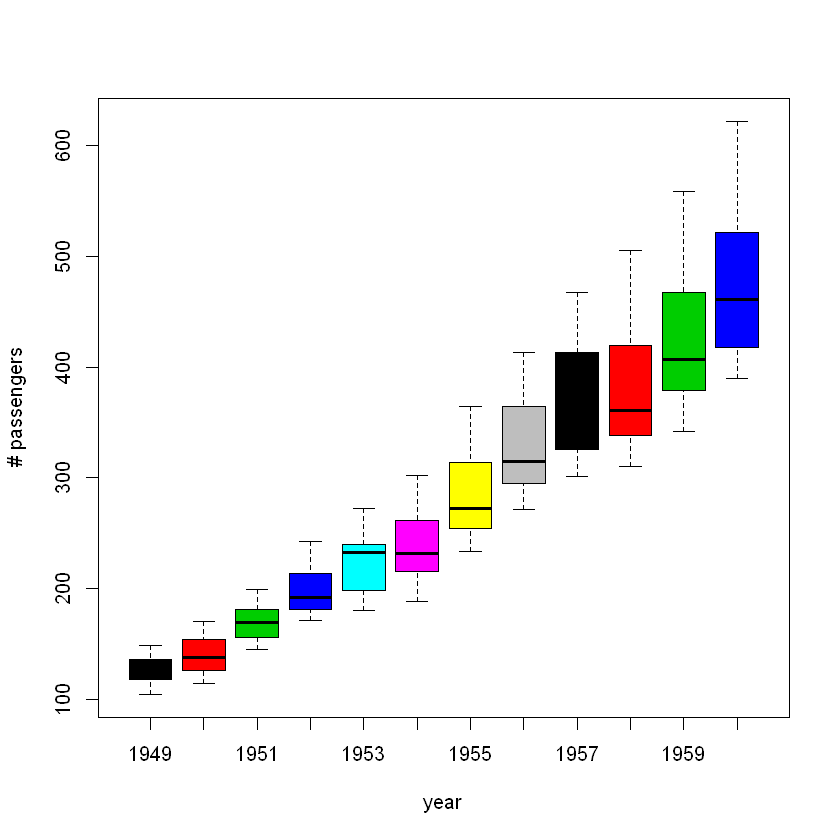

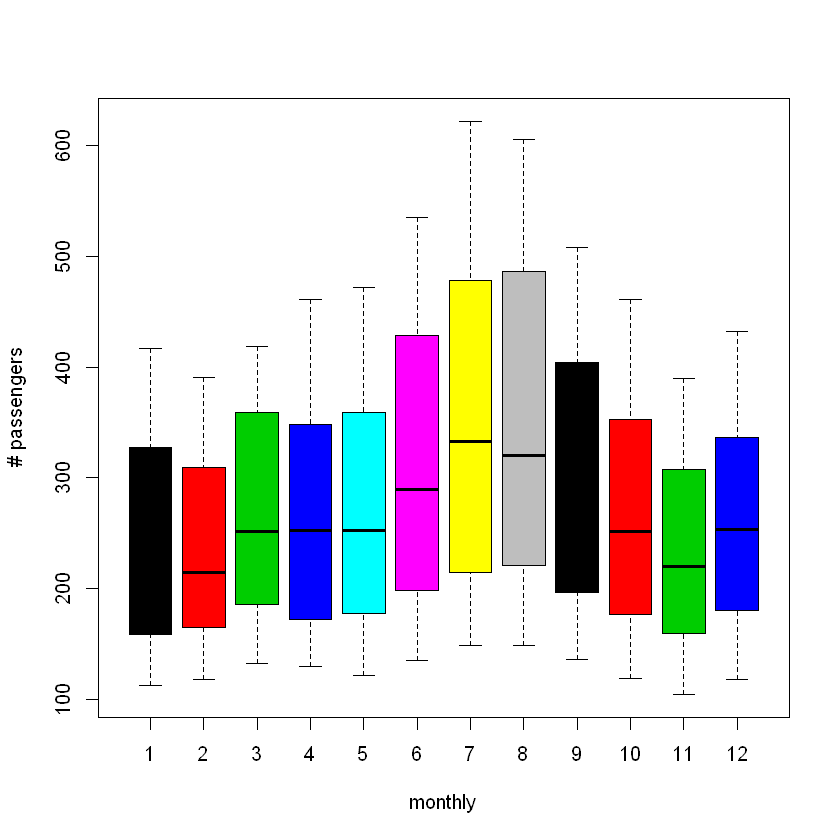

In [50]:
#boxplot by years
#Median values across years confirms an upwards trend
#Steady increase in the spread, or middle 50% of the data (boxes) over time
#A model considering seasonality might work well
# Boxplot across the months will give us a sense of the seasonal effects
year <- as.numeric(format(IntlAirPassengers$Month,'%Y'))
boxplot(IntlAirPassengers$monthly_passengers~year, col=c(1:12), ylab = "# passengers")

monthly <- as.numeric(format(IntlAirPassengers$Month,'%m'))
boxplot(IntlAirPassengers$monthly_passengers~monthly, col=monthly, ylab = "# passengers")

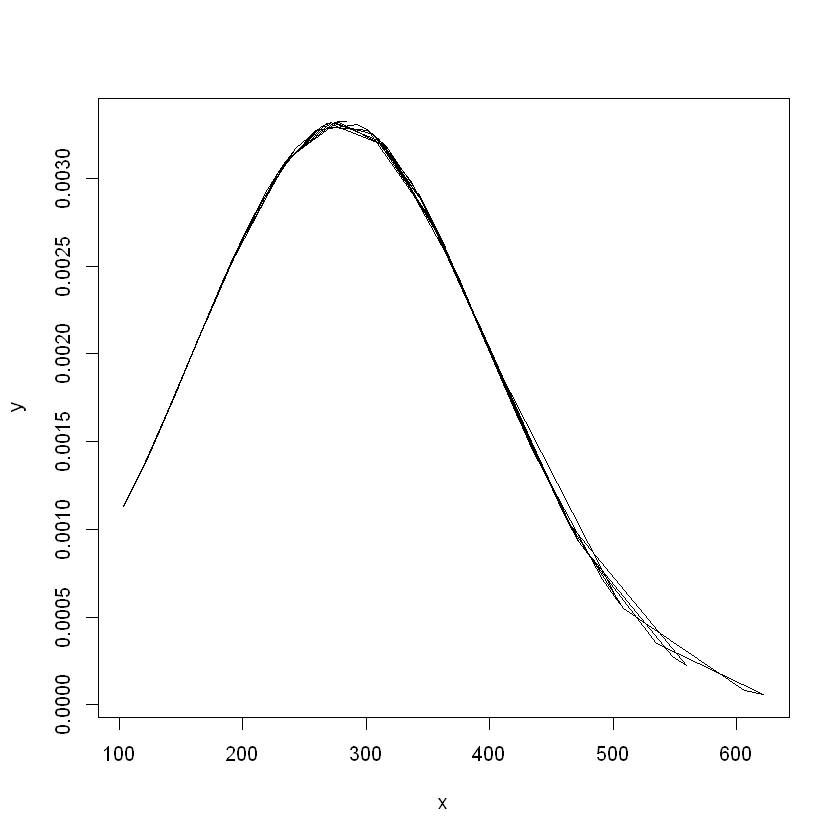

In [51]:
# checking normal distribution. data is right skewed, not perfectly Gaussian (normal), transformations might be helpful
x <- IntlAirPassengers$monthly_passengers
y <- dnorm(IntlAirPassengers$monthly_passengers, mean = mean(IntlAirPassengers$monthly_passengers), sd = sd(IntlAirPassengers$monthly_passengers))
plot(x,y, type = "l")


In [52]:
# CHECKING THE DATA FREQUENCY
frequency(IntlAirPassengers$monthly_passengers)


[1] 1

In [ ]:
#DECOMPOSING THE DATA TO CHECK THE TREND, SEASONALITY AND RANDOM NOISE
#Seasonal: Patterns that repeat with a fixed period of time. For example, a website might receive more visits during weekends; this would produce data with a seasonality of 7 days.
#Trend: The underlying trend of the metrics. A website increasing in popularity should show a general trend that goes up.
#Random: Also call “noise”, “irregular” or “remainder,” this is the residuals of the original time series after the seasonal and trend series are removed.
#Additive decomposition = Seasonal + Trend + Random
##Multiplicative decomposition = Seasonal * Trend * Random


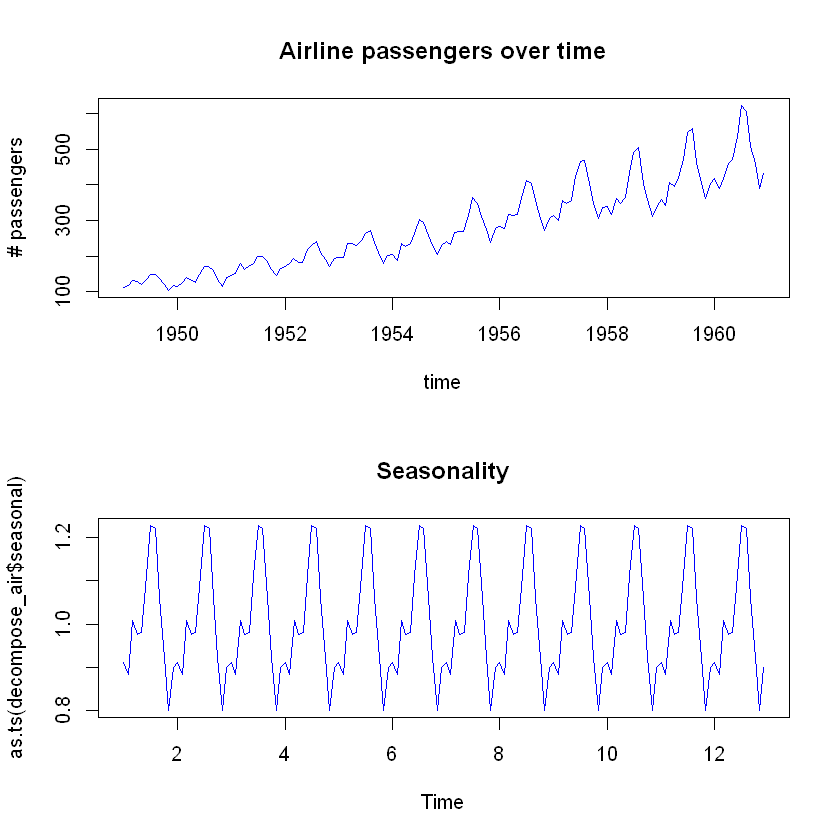

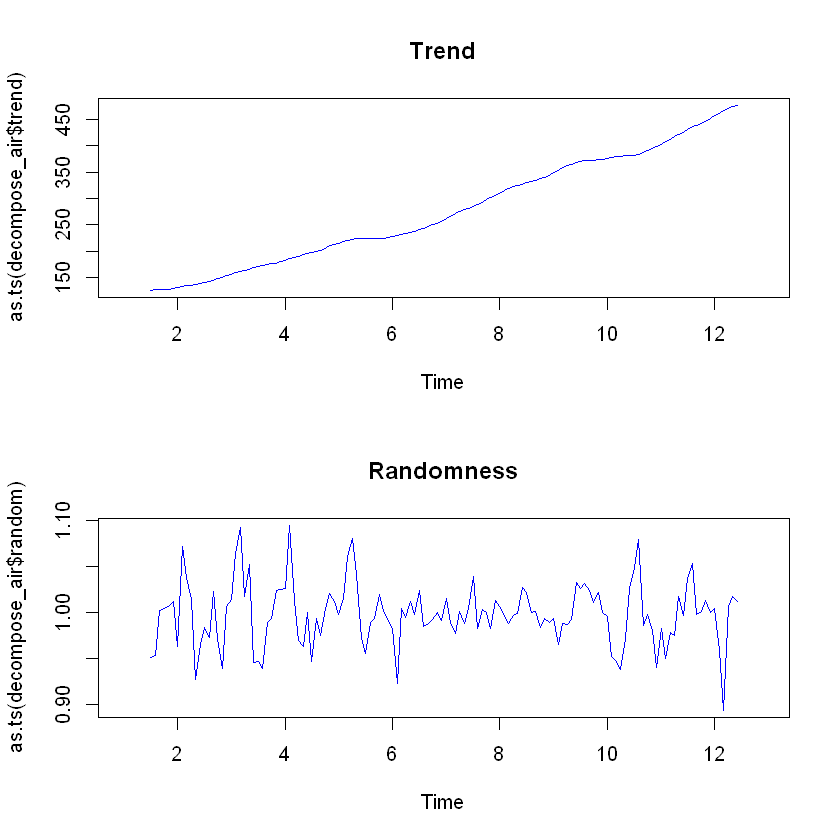

In [53]:
# TO DETECT TREND

ts_air <- ts(IntlAirPassengers$monthly_passengers, frequency = 12)
decompose_air <- decompose(ts_air, "multiplicative")
par(mfrow=c(2,1))
# Line graph
plot(IntlAirPassengers$Month,IntlAirPassengers$monthly_passengers, type="l", col="blue", xlab = "time", ylab = "# passengers", main = "Airline passengers over time")
plot(as.ts(decompose_air$seasonal), main = "Seasonality", type="l", col="blue")
plot(as.ts(decompose_air$trend), main = "Trend", type="l", col="blue")
plot(as.ts(decompose_air$random), main = "Randomness", type="l", col="blue")
par(mfrow=c(1,1))

#Stationarity
#A Time Series is said to be stationary if its statistical properties such as mean, variance remain constant over time.
#Most of the Time Series models work on the assumption that the TS is stationary. Major reason for this is that there are many ways in which a series can be non-stationary, but only one way for stationarity.
#Intuitively, we can say that if a Time Series has a particular behaviour over time, there is a very high probability that it will follow the same in the future.
#Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.


#We can check stationarity using the following:
  
#ACF and PACF plots: If the time series is stationary, the ACF/PACF plots will show a quick drop-off in correlation after a small amount of lag between points.
#Plotting Rolling Statistics: We can plot the moving average or moving variance and see if it varies with time. Moving average/variance is for any instant ‘t’, the average/variance of the last year, i.e. last 12 months.
#Augmented Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. 
#If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary. Refer this article for details.



#ACF and PACF plots
#Let's review the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots
#If the time series is stationary, the ACF/PACF plots will show a quick drop-off in correlation after a small amount of lag between points.
#This data is non-stationary as a high number of previous observations are correlated with future values.
#Confidence intervals are drawn as a cone.
#By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this code are very likely a correlation and not a statistical fluke.
#The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.


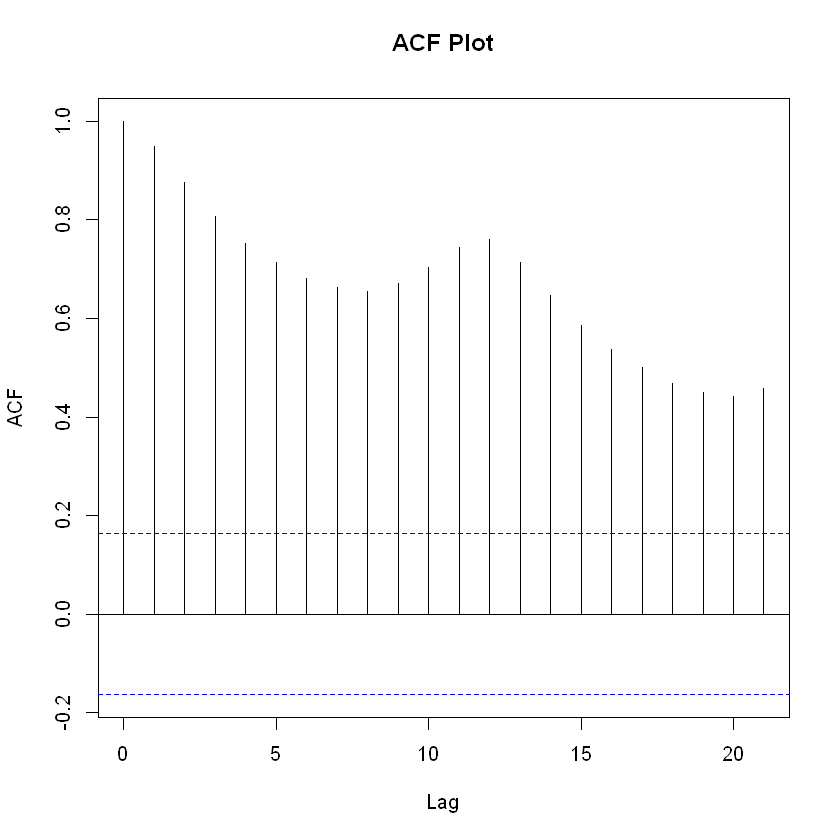

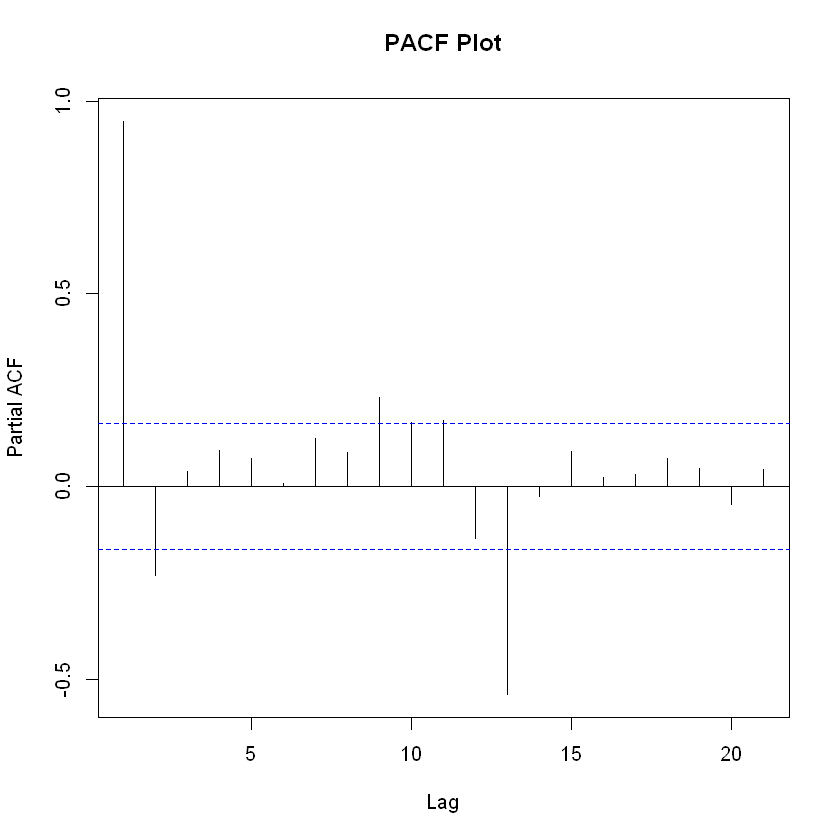

In [54]:
acf(IntlAirPassengers$monthly_passengers, main = "ACF Plot")
pacf(IntlAirPassengers$monthly_passengers, main = "PACF Plot")

#Clearly, the decay of ACF chart is very slow, which means that the population is not stationary.

#Plotting Rolling Statistics
#We observe that the rolling mean and Standard deviation are not constant with respect to time (increasing trend)
#The time series is hence not stationary